In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
print(tf.__version__)

c:\Users\Fajar\miniconda3\envs\tf\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


2.10.1


In [2]:
print("hello World")
print("Project Rock Paper Scissors Machine Learning")

hello World
Project Rock Paper Scissors Machine Learning


Extract Dataset From ZIP

In [3]:
import zipfile
import os

local_zip = 'Dataset/rsp.zip'
zip_extract = zipfile.ZipFile(local_zip, 'r')
zip_extract.extractall('Dataset')
zip_extract.close()

In [4]:
os.listdir('Dataset')

['1BqjHe5igJAgUjiN.png',
 'paper',
 'README_rpc-cv-images.txt',
 'rock',
 'rps-cv-images',
 'rsp.zip',
 'scissors']

In [5]:
base_dir = 'Dataset/rps-cv-images'

Image Pre-processing with Image Augmentation

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    horizontal_flip = True,
    shear_range = 0.2,
    fill_mode = 'wrap',
    validation_split = 0.4
)
train_datagen

Data for Model

In [7]:
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'training'
)
validation_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size = (100, 150),
    class_mode = 'categorical',
    subset = 'validation'
)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


Build Model

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(256, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(3, activation = 'softmax')
])

In [9]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

Callback to Early Stopping

In [10]:
accuracy_threshold = 98e-2
class my_callbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = None):
        if logs.get('accuracy') >= accuracy_threshold:
            print('\nFor Epoch', epoch, '\nAccuracy has reach = %2.2f%%' %(logs['accuracy']*100), 'training has been stopped.')
            self.model.stop_training = True

Training Model

In [11]:
history = model.fit(
    train_generator,
    steps_per_epoch = 25,
    epochs = 20,
    validation_data = validation_generator,
    validation_steps = 5,
    verbose = 2,
    callbacks = [my_callbacks()]
)

Epoch 1/20
25/25 - 26s - loss: 1.1048 - accuracy: 0.3600 - val_loss: 1.0308 - val_accuracy: 0.5375 - 26s/epoch - 1s/step
Epoch 2/20
25/25 - 14s - loss: 0.8041 - accuracy: 0.6545 - val_loss: 0.7666 - val_accuracy: 0.7250 - 14s/epoch - 557ms/step
Epoch 3/20
25/25 - 12s - loss: 0.3674 - accuracy: 0.8597 - val_loss: 0.2668 - val_accuracy: 0.9062 - 12s/epoch - 460ms/step
Epoch 4/20
25/25 - 11s - loss: 0.2665 - accuracy: 0.8975 - val_loss: 0.2448 - val_accuracy: 0.9312 - 11s/epoch - 440ms/step
Epoch 5/20
25/25 - 11s - loss: 0.1962 - accuracy: 0.9413 - val_loss: 0.2572 - val_accuracy: 0.9438 - 11s/epoch - 434ms/step
Epoch 6/20
25/25 - 11s - loss: 0.1787 - accuracy: 0.9416 - val_loss: 0.1974 - val_accuracy: 0.9438 - 11s/epoch - 428ms/step
Epoch 7/20
25/25 - 10s - loss: 0.1393 - accuracy: 0.9571 - val_loss: 0.2161 - val_accuracy: 0.9312 - 10s/epoch - 419ms/step
Epoch 8/20
25/25 - 10s - loss: 0.2134 - accuracy: 0.9250 - val_loss: 0.2458 - val_accuracy: 0.9187 - 10s/epoch - 420ms/step
Epoch 9/20


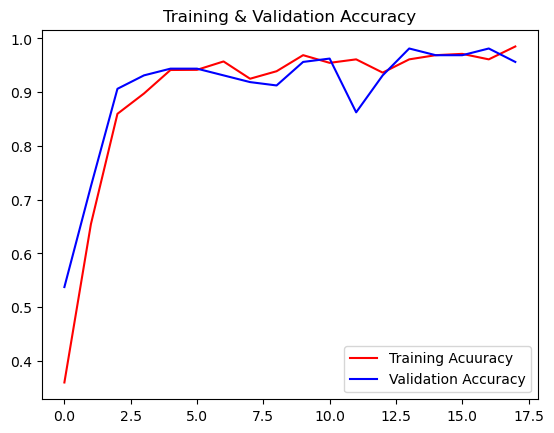

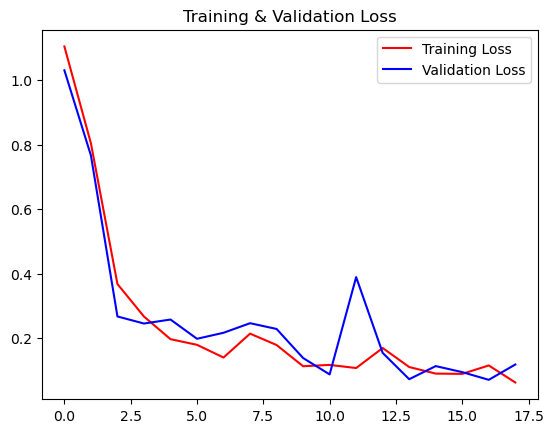

<Figure size 640x480 with 0 Axes>

In [42]:
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training Acuuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.Figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training & Validation Loss')
plt.legend()
plt.figure()
plt.show()

Predict Model

1/1 [==============================] - 0s 49ms/step
scissors


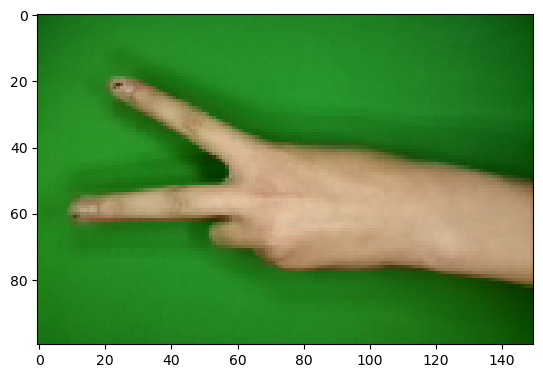

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline


path = 'Dataset/rps-cv-images/scissors/cDveaur4dR2ZCCo8.png'
img_source = tf.keras.preprocessing.image.load_img(path, target_size = (100, 150))
imgplot = plt.imshow(img_source)
x = image.img_to_array(img_source)
x = np.expand_dims(x, axis = 0)


images = np.vstack([x])
classes = model.predict(images, batch_size = 10)

if classes[0, 0] == 1:
    print('paper')
elif classes[0, 1] == 1:
    print('rock')
elif classes[0, 2] == 1:
    print('scissors')